<h2><center>American Sign Language Detection</center></h2>

# About
The data set is a collection of images of alphabets from the American Sign Language, separated in 29 folders which represent the various classes.

# Content
The training data set contains 87,000 images which are 200x200 pixels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING.

These 3 classes are very helpful in real-time applications, and classification.

The test data set contains a mere 29 images, to encourage the use of real-world test images.

# Introduction
Sign language is a vital form of communication for millions of people around the world. However, it can be a challenge for those who are not familiar with sign language to communicate with those who use it as their primary language. Automatic sign language recognition systems can help bridge this communication gap by translating sign language into text or speech. In this report, we investigate the performance of various deep learning models on the ASL Alphabet dataset for image classification tasks. The motivation behind the investigation is to identify the most effective models for sign language recognition tasks and explore the strengths and weaknesses of each model.

The ASL Alphabet dataset consists of 87,000 images of 200x200 pixels, representing the 26 letters of the American Sign Language alphabet. The dataset was collected by the “Grassroots” organization and made publicly available on Kaggle. The dataset is divided into a training set and a test set, with 29,000 and 5,000 images, respectively.

Table of contents <a id=19></a>
1. [Importing packages](#1)
2. [Importing the dataset from training directory](#2)
    - 2.1 [Checking the shape of data](#3)
    - 2.2 [Checking the shape of one image](#4)
    - 2.3 [Viewing the image](#5)
3. [Data processing](#6)
    - 3.1 [Train/test split](#7)
    - 3.2 [One-Hot-Encoding](#8)
    - 3.3 [Dimension Check of variables](#9)
4. [Garbage Collection](#10)
5. [Modeling](#11)
    - 5.1 [Importing packages](#12)
    - 5.2 [Building the model](#13)
    - 5.3 [Early Stopping & Compiling](#14)
    - 5.4 [Model fitting](#15)
    - 5.5 [Model metrics](#16)
    - 5.6 [Predictions](#17)
    - 5.7 [Saving the model](#18)

### 1. Importing packages <a id=1></a>

In [2]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


### 2. Importing the dataset from training directory <a id=2></a>

In [3]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = 'datasets/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int64)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


#### 2.1 Checking the shape of data <a id=3></a>

In [4]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


#### 2.2 Checking the shape of one image <a id=4></a>

In [5]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


#### 2.3 Viewing the image <a id=5></a>

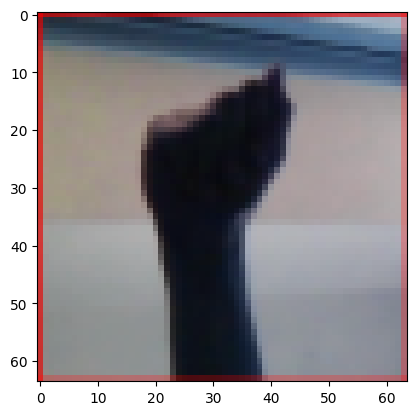

In [6]:
plt.imshow(X_train[0])
plt.show()

##### 2.3.1 Making copies of original data

In [7]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


### 3. Data processing <a id=6></a>

Before we can train our models, we need to preprocess the dataset to ensure that it is in a suitable format. We began by loading the dataset using TensorFlow’s Keras API and normalizing the pixel values to a range between 0 and 1. We then performed data augmentation to increase the size of the training set and improve model generalization. Specifically, we applied random rotations, zooms, and horizontal flips to the training images.

To get a better understanding of the dataset, we also visualized a subset of the images using matplotlib. We found that the images are generally well-captured, with the hand signs clearly distinguishable.

#### 3.1 Train/test split <a id=7></a>

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

#### 3.2 One-Hot-Encoding <a id=8></a>

In [9]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

#### 3.3 Dimension Check of variables <a id=9></a>

In [10]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


### 4. Garbage Collection <a id=10></a>

In [11]:
# This is done to save CPU and RAM space while working on Kaggle Kernels. This will delete the specified data and save some space!
import gc
del X_data
del y_data
gc.collect()

3135

### 5. Modeling <a id=11></a>

#### 5.1 Importing packages <a id=12></a>

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


#### 5.2 Building model <a id=13></a>

In [13]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

#### 5.3 Early Stopping and Compiling <a id=14></a>

##### 5.3.1 Early Stopping

Early Stopping is done to make sure the model fitting stops at the most optimized accuracy point. After the early stopping point, the model might start overfitting. For testing purposes, this step can be skipped and complete training can be done.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

##### 5.3.2 Compiling

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 5.4 Model fitting <a id=15></a>

In [16]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50
952/952 - 108s - loss: 1.0224 - accuracy: 0.6907 - val_loss: 0.2436 - val_accuracy: 0.9226 - 108s/epoch - 113ms/step
Epoch 2/50
952/952 - 108s - loss: 0.1508 - accuracy: 0.9515 - val_loss: 0.1008 - val_accuracy: 0.9664 - 108s/epoch - 113ms/step
Epoch 3/50
952/952 - 107s - loss: 0.0715 - accuracy: 0.9777 - val_loss: 0.0990 - val_accuracy: 0.9679 - 107s/epoch - 113ms/step
Epoch 4/50
952/952 - 107s - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.0415 - val_accuracy: 0.9882 - 107s/epoch - 112ms/step
Epoch 5/50
952/952 - 107s - loss: 0.0346 - accuracy: 0.9899 - val_loss: 0.0555 - val_accuracy: 0.9825 - 107s/epoch - 112ms/step
Epoch 6/50
952/952 - 107s - loss: 0.0398 - accuracy: 0.9886 - val_loss: 0.0257 - val_accuracy: 0.9928 - 107s/epoch - 112ms/step
Epoch 7/50
952/952 - 106s - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0308 - val_accuracy: 0.9897 - 106s/epoch - 112ms/step
Epoch 8/50
952/952 - 107s - loss: 0.0244 - accuracy: 0.9931 - val_loss: 0.0747 - val_accuracy: 0.9792 - 

#### 5.5 Model metrics <a id=16></a>

##### 5.5.1 Metrics from model history

In [17]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.022439,0.690723,0.243573,0.922644
1,0.150802,0.951494,0.100771,0.966437
2,0.071504,0.977718,0.099047,0.967854
3,0.048866,0.985090,0.041533,0.988238
4,0.034590,0.989885,0.055501,0.982452
5,0.039790,0.988604,0.025690,0.992797
6,0.026122,0.992266,0.030773,0.989693
7,0.024407,0.993087,0.074726,0.979234


##### 5.5.2 Plotting the training loss

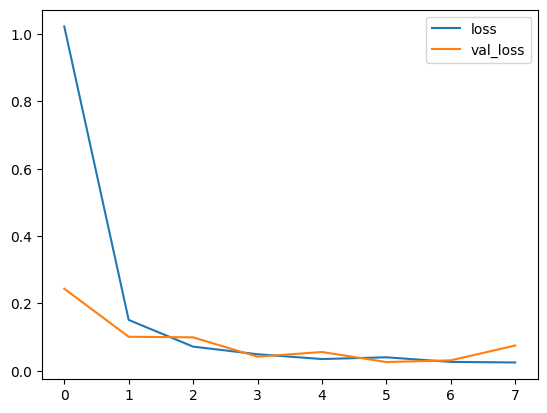

In [18]:
metrics[['loss','val_loss']].plot()
plt.show()

##### 5.5.3 Plotting the testing loss

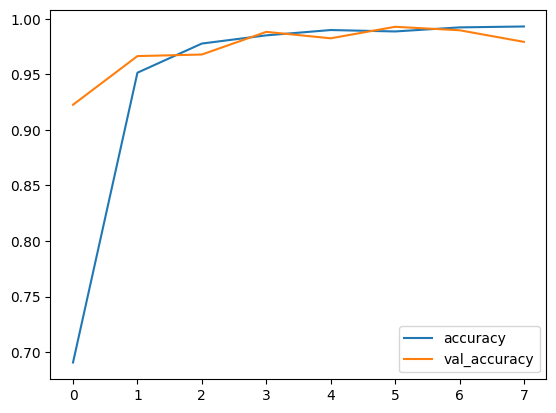

In [19]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

##### 5.5.4 Model evaluation

In [25]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.0747256726026535, 0.9792337417602539]

#### 5.6 Predictions <a id=17></a>

In [39]:
predictions = np.argmax(model.predict(X_test),axis=1)
print("Predictions done...")

816/816 [==============================] - 12s 15ms/step
Predictions done...


##### 5.6.1 Classification report

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       900
           1       0.99      0.97      0.98       900
           2       1.00      1.00      1.00       900
           3       0.99      0.99      0.99       900
           4       1.00      0.90      0.94       900
           5       0.99      0.99      0.99       900
           6       0.99      0.88      0.93       900
           7       0.90      1.00      0.94       900
           8       0.94      1.00      0.97       900
           9       1.00      0.99      0.99       900
          10       0.95      1.00      0.98       900
          11       1.00      0.99      0.99       900
          12       0.97      1.00      0.98       900
          13       0.99      0.99      0.99       900
          14       1.00      0.98      0.99       900
          15       1.00      0.99      0.99       900
          16       1.00      1.00      1.00       900
          17       0.91    

##### 5.6.2 Confusion matrix heatmap

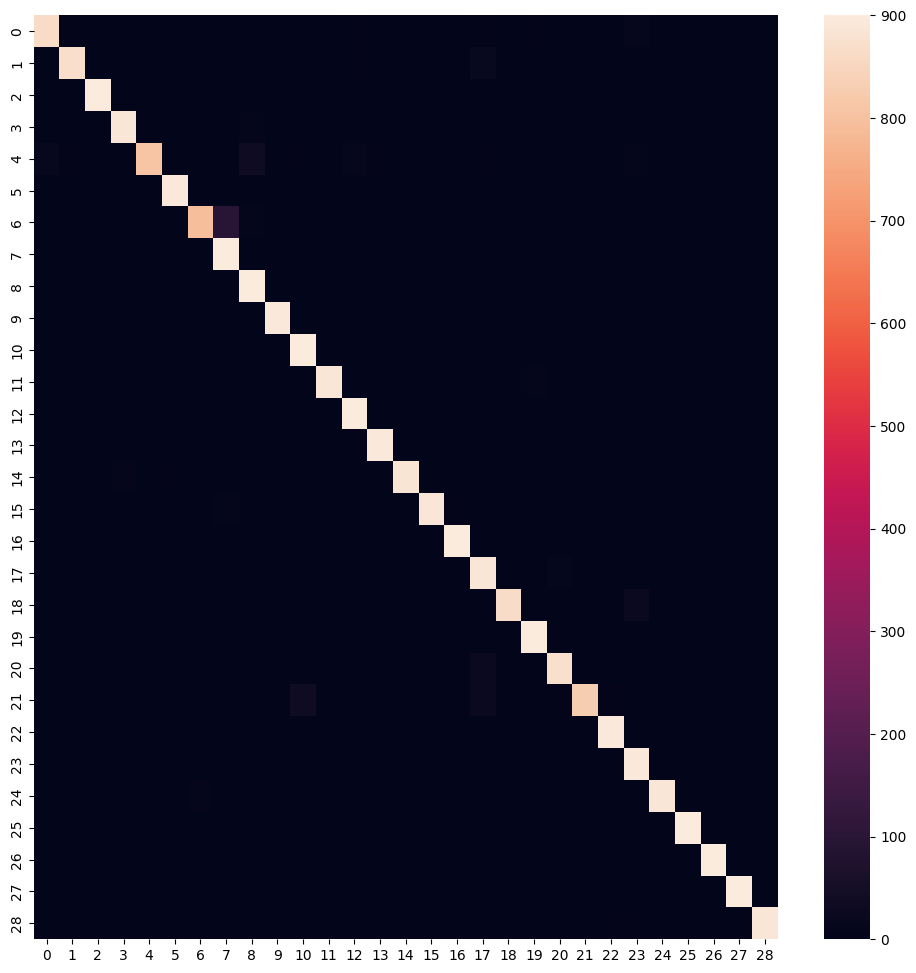

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,predictions))
plt.show()

#### 5.7 Saving the model <a id=18></a>

In [42]:
# from keras.models import load_model
# model.save('ASL.h5')
print("Model saved successfully...")

Model saved successfully...


[back to top](#19)